I will be using Machine Learning Models to predict the customer churn on open datasource . Before that, I will be taking necessary steps to set up the data:

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import csv file
data = pd.read_csv('Churn Modeling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# remove the irrelevant columns

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [7]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#data size
data.shape

(10000, 11)

## Categorical Columns

In [9]:
cat = data[['Geography','Gender','NumOfProducts', 'HasCrCard',   'IsActiveMember']]

I'm going to convert categorical data using dummies variables.

In [10]:
#Dummy variables 
dummie = pd.get_dummies(cat)

In [11]:
# concat the data with the database and drop the original columns
df = pd.concat([data,dummie],axis=1)

In [12]:
df.shape

(10000, 19)

In [13]:
#Dropping Original Columns
df = df.drop(['Geography','Gender','NumOfProducts', 'HasCrCard','IsActiveMember'],axis=1)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,79084.10,0,0,0,1,1,0


In [15]:
df.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64

## Model

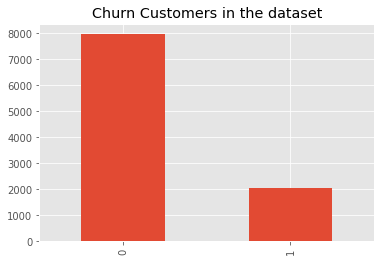

In [16]:
import matplotlib.style as style 
style.use('ggplot')
df['Exited'].value_counts().plot(kind='bar', title ='Churn Customers in the dataset')

In [17]:
#Setting Variables
X = df.drop('Exited',axis=1)
y = df['Exited']

In [18]:
#splitting the data set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Accuary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Hypertunning 
from sklearn.model_selection import GridSearchCV

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 10), (2500, 10), (7500,), (2500,))

In [20]:

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [21]:
%%time
log_pred = logreg.predict(X_test)
train_log_pred = logreg.predict(X_train)
leg_score = accuracy_score(log_pred,y_test)
test_score = accuracy_score(train_log_pred,y_train)
print('model 1 accuracy score {} on Testing Data'.format(leg_score))
print('model 1 accuracy score {} on Training Data'.format(test_score))

model 1 accuracy score 0.8 on Testing Data
model 1 accuracy score 0.7869333333333334 on Training Data
Wall time: 8.98 ms


              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2003
           1       0.48      0.08      0.14       497

    accuracy                           0.80      2500
   macro avg       0.65      0.53      0.52      2500
weighted avg       0.75      0.80      0.74      2500



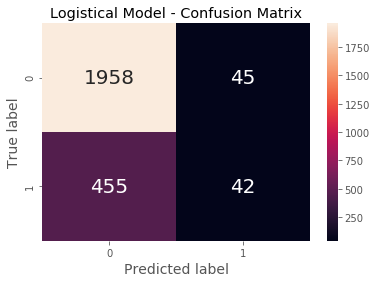

In [22]:
## Use Confusion Matrix to see How model behaviour on Sucess and failure. 
confusion_matrix = confusion_matrix(y_test, log_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix)
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
plt.title('Logistical Model - Confusion Matrix')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
print(classification_report(y_test,log_pred))

Due to the imbalance in the dataset, Model can't accurately predict the churn customers. I'm going to use SMOTE technique to Oversample the churn customers in the dataset - hopefully this would help to improve the model.

## SMOTE

In [31]:
#libraries
from imblearn.over_sampling import SMOTE

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
import six
import sys
sys.modules['sklearn.externals.joblib'] = joblib
sys.modules['sklearn.externals.six'] = six
import mlrose

In [30]:
from sklearn.externals import six,joblib

In [27]:
import joblib

In [32]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_sample(X, y)


Before OverSampling, counts of label '1': 1540
Before OverSampling, counts of label '0': 5960 



C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [33]:
print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(X_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

After OverSampling, the shape of train_X: (15926, 10)
After OverSampling, the shape of train_y: (15926, 10) 

After OverSampling, counts of label '1': 7963
After OverSampling, counts of label '0': 7963


In [34]:
X_train_res,X_test_res,y_train_res,y_test_res = train_test_split(X_res,y_res,test_size=0.25,random_state=42)
X_train_res.shape, X_test_res.shape, y_train_res.shape, y_test_res.shape

((11944, 10), (3982, 10), (11944,), (3982,))

In [35]:
%%time
log_pred = logreg.predict(X_test_res)
train_log_pred = logreg.predict(X_train_res)
leg_score = accuracy_score(log_pred,y_test_res)
test_score = accuracy_score(train_log_pred,y_train_res)
print('model 1 accuracy score {} on Testing Data'.format(leg_score))
print('model 1 accuracy score {} on Training Data'.format(test_score))

model 1 accuracy score 0.5160723254645907 on Testing Data
model 1 accuracy score 0.5036001339584729 on Training Data
Wall time: 6.98 ms


              precision    recall  f1-score   support

           0       0.51      0.97      0.67      2036
           1       0.57      0.04      0.08      1946

    accuracy                           0.52      3982
   macro avg       0.54      0.51      0.37      3982
weighted avg       0.54      0.52      0.38      3982



C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)


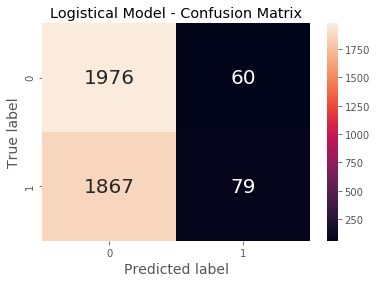

In [36]:
## Use Confusion Matrix to see How model behaviour on Sucess and failure. 
## Use Confusion Matrix to see How model behaviour on Sucess and failure. 
#Accuary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test_res, log_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix)
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
plt.title('Logistical Model - Confusion Matrix')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
print(classification_report(y_test_res,log_pred))

In [38]:
Knn = KNeighborsClassifier()
Knn.fit(X_train_res,y_train_res)
knn_pred = Knn.predict(X_test_res)
knn_train_pred = Knn.predict(X_train_res)
knn_score = accuracy_score(knn_pred, y_test_res)
knn_train_score = accuracy_score(knn_train_pred, y_train_res)

print('model 2 accuracy score {} testing'.format(knn_score))
print('model 2 accuracy score {} training'.format(knn_train_score))

model 2 accuracy score 0.6755399296835761 testing
model 2 accuracy score 0.7881781647689217 training


              precision    recall  f1-score   support

           0       0.72      0.60      0.65      2036
           1       0.64      0.75      0.69      1946

    accuracy                           0.68      3982
   macro avg       0.68      0.68      0.67      3982
weighted avg       0.68      0.68      0.67      3982



C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)


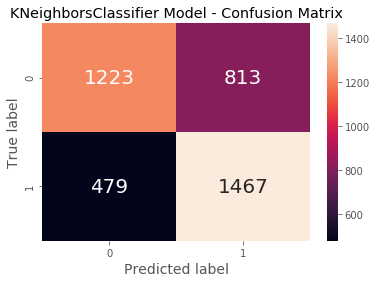

In [39]:
## Use Confusion Matrix to see How model behaviour on Sucess and failure. 
#Accuary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test_res, knn_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix)
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
plt.title('KNeighborsClassifier Model - Confusion Matrix')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
print(classification_report(y_test_res,knn_pred))

In [40]:
rfc = RandomForestClassifier()
rfc.fit(X_train_res,y_train_res)
rfc_pred = rfc.predict(X_test_res)
rfc_train_pred = rfc.predict(X_train_res)

rfc_score = accuracy_score(rfc_pred,y_test_res)
rfc_train_score = accuracy_score(rfc_train_pred,y_train_res)

print('model 3 accuracy score {} testing'.format(rfc_score))
print('model 3 accuracy score {} training'.format(rfc_train_score))

model 3 accuracy score 0.8711702661978905 testing
model 3 accuracy score 1.0 training


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2036
           1       0.90      0.83      0.86      1946

    accuracy                           0.87      3982
   macro avg       0.87      0.87      0.87      3982
weighted avg       0.87      0.87      0.87      3982



C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)


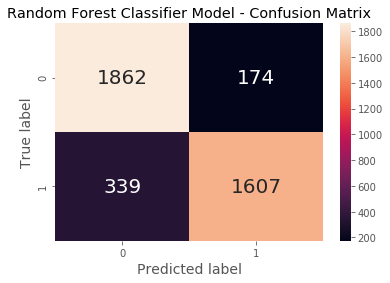

In [42]:
## Use Confusion Matrix to see How model behaviour on Sucess and failure. 
#Accuary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test_res, rfc_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix)
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
plt.title('Random Forest Classifier Model - Confusion Matrix')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
print(classification_report(y_test_res,rfc_pred))

In [43]:
tree = DecisionTreeClassifier()
tree.fit(X_train_res,y_train_res)
tree_pred = tree.predict(X_test_res)
tree_train_pred = tree.predict(X_train_res)

tree_score = accuracy_score(tree_pred,y_test_res)
tree_train_score = accuracy_score(tree_train_pred,y_train_res)

print('model 4 accuracy score {} testing'.format(tree_score))
print('model 4 accuracy score {} training'.format(tree_train_score))

model 4 accuracy score 0.8111501757910597 testing
model 4 accuracy score 1.0 training


              precision    recall  f1-score   support

           0       0.82      0.81      0.81      2036
           1       0.80      0.81      0.81      1946

    accuracy                           0.81      3982
   macro avg       0.81      0.81      0.81      3982
weighted avg       0.81      0.81      0.81      3982



C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)


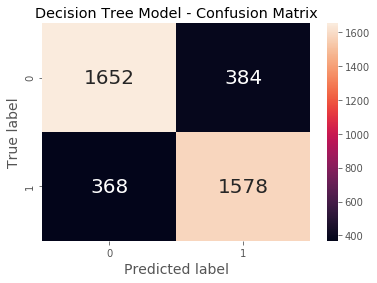

In [44]:
## Use Confusion Matrix to see How model behaviour on Sucess and failure. 
#Accuary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test_res, tree_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix)
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
plt.title('Decision Tree Model - Confusion Matrix')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
print(classification_report(y_test_res,tree_pred))

## Hyperparameter Tuning

In [45]:
rfc=RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc,param_grid =param_grid,cv= 5,verbose =1,n_jobs = -1)
CV_rfc.fit(X_train_res, y_train_res)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.9min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300]},
             verbose=1)

In [46]:
print('rfc best params:', CV_rfc.best_params_)
print('rfc scores:', CV_rfc.best_score_)

rfc best params: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}
rfc scores: 0.8431012674647128


In [47]:
CV_ref_pred = CV_rfc.predict(X_test_res)

In [48]:
print('Train Accuracy:',accuracy_score(y_train_res, CV_rfc.predict(X_train_res)))
print('Test Accuracy:', accuracy_score(y_test_res, CV_ref_pred))

Train Accuracy: 0.8584226389819156
Test Accuracy: 0.8340030135610246


              precision    recall  f1-score   support

           0       0.81      0.88      0.84      2036
           1       0.86      0.78      0.82      1946

    accuracy                           0.83      3982
   macro avg       0.84      0.83      0.83      3982
weighted avg       0.84      0.83      0.83      3982



C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)


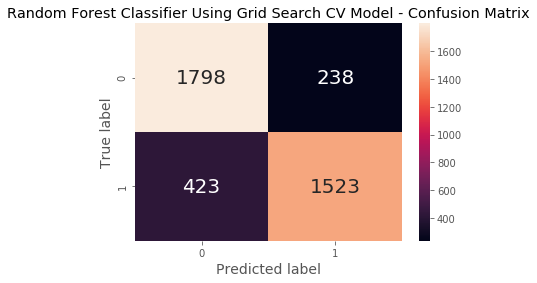

In [49]:
## Use Confusion Matrix to see How model behaviour on Sucess and failure. 
#Accuary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test_res, CV_ref_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix)
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
plt.title('Random Forest Classifier Using Grid Search CV Model - Confusion Matrix')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
print(classification_report(y_test_res,CV_ref_pred))

## Save Model

In [69]:
import pickle
pickl = {'model': CV_rfc}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [97]:
import pickle
import gzip
pickl = {'model': CV_rfc}

def save_zipped_pickle(pickl, filename, protocol=-1):
    with gzip.open(filename, 'wb') as f:
        pickle.dump(pickl, f, protocol)

## Test Flask in Production

In [70]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [71]:
model.predict(np.array(list(X_test.iloc[445,:])).reshape(1,-1))[0]


0

In [72]:
X_test.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [73]:
X_test.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
EstimatedSalary      float64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

In [74]:
list(X_test.iloc[87,:])

[747.0, 45.0, 1.0, 114959.12, 189362.39, 1.0, 0.0, 0.0, 1.0, 0.0]